# Preamble

In [1]:
import os
os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD')

%matplotlib inline 

import mycode.tomo.tomo_fncs as tomo_fncs
import mycode.errors as errors
import mycode.preamble as preamble
import mycode.weights as weights 
import mycode.maps as maps 

from tqdm import tqdm 

%run mycode/preamble.py

from importlib import reload
reload(errors)
reload(weights)
reload(preamble)
reload(maps)

<module 'mycode.maps' from '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD/mycode/maps.py'>

# Read catalogues

## cuts and filters

In [2]:
#filters to apply as reading the catalogue. 
prefilters = [
    maps.get_non_duplicated_cat
]


ffilters = [maps.good, maps.best]

### cuts on condition number 

In [3]:
gcond = lambda cat: cat[cat['cond_num'] < 1e14]
gcond_grp = lambda cat: cat[cat['cond_num_grp'] < 1e14]
ffilters.append(gcond)
ffilters.append(gcond_grp)

## read

In [4]:
main_catsLSST=[Table.read("data/projectLSST-g1_0-g2_0/final_fits.fits"), 
               Table.read("data/projectLSST-g1_20-g2_0/final_fits.fits") ]

pfmain_catsLSST = maps.get_intersection_cats(maps.get_filter_cats(main_catsLSST, prefilters))
cat1 = pfmain_catsLSST[0]
cat2 = pfmain_catsLSST[1]

In [26]:
scat1 = maps.get_filter_cats([cat1], ffilters)[0]
print(len(scat1))

#remember to not apply filters directly on cat2, but intersect
scat1, scat2 = maps.get_intersection_cats([scat1, cat2]) 
print(len(scat1),len(scat2))

77657
77657 77657


# Condition numbers 

## Distribution of condition numbers blending off and on 

In [69]:
unique_cond = np.array(list(set(cat1[cat1['cond_num_grp'] < np.inf]['cond_num_grp'])))

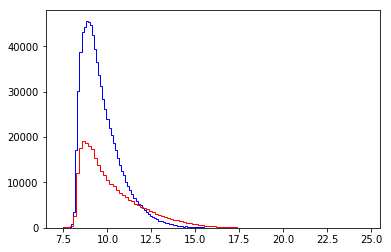

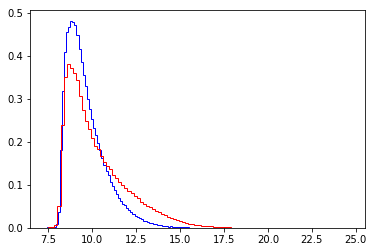

In [72]:
plt.hist(np.log10(cat1[cat1['cond_num'] < np.inf]['cond_num']) , bins=100, density=False, histtype='step', color='b');
plt.hist(np.log10(unique_cond), bins=100, color='r', density=False, histtype='step');
plt.figure() 
plt.hist(np.log10(cat1[cat1['cond_num'] < np.inf]['cond_num']) , bins=100, density=True, histtype='step', color='b');
plt.hist(np.log10(unique_cond), bins=100, color='r', density=True, histtype='step');

## cond num iso cut vs cond num grp 

In [6]:
#number of objects that pass grp cut but not the iso cut, 
np.sum( (cat1['cond_num_grp'] < 1e14) & (cat1['cond_num'] > 1e14)  )

0

In [6]:
#number of galaxies
np.sum( (cat1['cond_num_grp'] < cat1['cond_num'] ))

29

In [14]:
len(cat1[ (cat1['snr_grpf'] == 0)&(cat1['cond_num_grp'] == np.inf)])

1243

In [12]:
len(cat1[cat1['cond_num_grp'] == np.inf])

2141

In [10]:
print(np.log10(cat1[(cat1['cond_num_grp'] < cat1['cond_num'])]['cond_num_grp']))
print(np.log10(cat1[(cat1['cond_num_grp'] < cat1['cond_num'])]['cond_num']))

cond_num_grp
------------
   19.655941
   21.264694
   18.899889
    11.93522
   20.465553
   14.178725
   11.364027
   14.424226
   18.538391
   20.675615
         ...
   18.633066
   18.078352
   18.003159
   12.481124
   21.940836
   12.582288
   11.177645
   12.488251
   23.172478
   24.649273
   12.559674
Length = 29 rows
 cond_num
---------
      inf
      inf
      inf
 11.93522
      inf
14.181977
11.364027
14.427945
      inf
      inf
      ...
      inf
      inf
      inf
12.481125
      inf
 12.58229
11.177645
12.488254
      inf
      inf
12.559686
Length = 29 rows


## condition number vs. bias 

### all galaxies

In [20]:
cond = (cat1['cond_num'] < np.inf) & (cat1['snr_grpf']  != 0) & (cat1['cond_num_grp'] < np.inf)
cond2 = cond & (cat1['grp_size']==1)

cond_num_iso = np.log10(cat1[cond]['cond_num'])
cond_num_grp = np.log10(cat1[cond]['cond_num_grp'])
bias_iso = np.log10(np.absolute(cat1[cond]['bias_g1']))
bias_grp = np.log10(np.absolute(cat1[cond]['bias_g1_grp']))

#check the bottom plots for objects that have grp size= 1. 
cond_num_iso2 = np.log10(cat1[cond2]['cond_num'])
cond_num_grp2 = np.log10(cat1[cond2]['cond_num_grp'])
bias_iso2 = np.log10(np.absolute(cat1[cond2]['bias_g1']))
bias_grp2 = np.log10(np.absolute(cat1[cond2]['bias_g1_grp']))

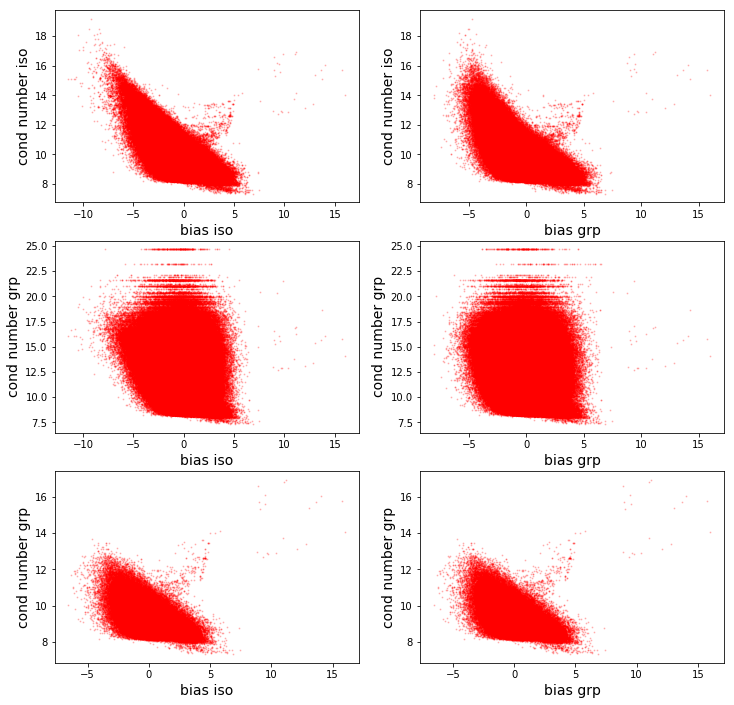

In [19]:
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(12,12))
axes = axs.flatten()
axes[0].scatter(bias_iso, cond_num_iso, c='r', alpha=0.2, s=1)
axes[0].set_xlabel("bias iso", size=14); 
axes[0].set_ylabel("cond number iso", size=14)

axes[1].scatter(bias_grp, cond_num_iso, c='r', alpha=0.2, s=1)
axes[1].set_xlabel("bias grp", size=14); 
axes[1].set_ylabel("cond number iso", size=14)

axes[2].scatter(bias_iso, cond_num_grp, c='r', alpha=0.2, s=1)
axes[2].set_xlabel("bias iso", size=14); 
axes[2].set_ylabel("cond number grp", size=14)

axes[3].scatter(bias_grp, cond_num_grp, c='r', alpha=0.2, s=1)
axes[3].set_xlabel("bias grp", size=14); 
axes[3].set_ylabel("cond number grp", size=14);

axes[4].scatter(bias_iso2, cond_num_grp2, c='r', alpha=0.2, s=1)
axes[4].set_xlabel("bias iso", size=14); 
axes[4].set_ylabel("cond number grp", size=14)

axes[5].scatter(bias_grp2, cond_num_grp2, c='r', alpha=0.2, s=1)
axes[5].set_xlabel("bias grp", size=14); 
axes[5].set_ylabel("cond number grp", size=14);

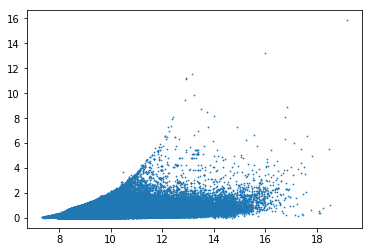

In [23]:
plt.scatter(np.log10(cat1['cond_num']), cat1['sigma_m'], s=0.5)

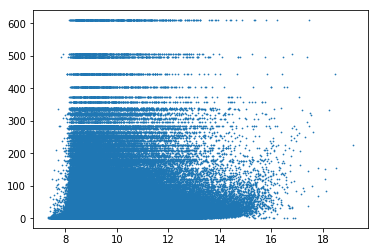

In [24]:
plt.scatter(np.log10(cat1['cond_num']), cat1['grp_size'], s=0.5)

### Galaxies with selection cuts  (excluding condition numbers cuts) 

In [162]:
temp1 = maps.good(maps.best(cat1))
cond = (temp1['cond_num'] < np.inf) & (temp1['bias_g1_grp']  != 0) & (temp1['cond_num_grp'] < np.inf)
cond_num_iso = np.log10(temp1[cond]['cond_num'])
cond_num_grp = np.log10(temp1[cond]['cond_num_grp'])
bias_iso = np.log10(np.absolute(temp1[cond]['bias_g1']))
bias_grp = np.log10(np.absolute(temp1[cond]['bias_g1_grp']))

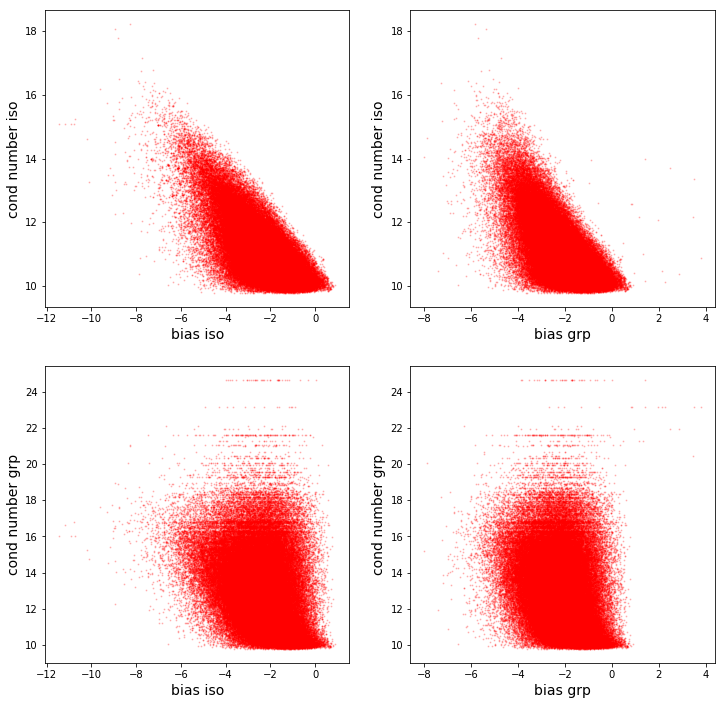

In [163]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
axes = axs.flatten()
axes[0].scatter(bias_iso, cond_num_iso, c='r', alpha=0.2, s=1)
axes[0].set_xlabel("bias iso", size=14); 
axes[0].set_ylabel("cond number iso", size=14)

axes[1].scatter(bias_grp, cond_num_iso, c='r', alpha=0.2, s=1)
axes[1].set_xlabel("bias grp", size=14); 
axes[1].set_ylabel("cond number iso", size=14)

axes[2].scatter(bias_iso, cond_num_grp, c='r', alpha=0.2, s=1)
axes[2].set_xlabel("bias iso", size=14); 
axes[2].set_ylabel("cond number grp", size=14)

axes[3].scatter(bias_grp, cond_num_grp, c='r', alpha=0.2, s=1)
axes[3].set_xlabel("bias grp", size=14); 
axes[3].set_ylabel("cond number grp", size=14);

# Bias 

## bias histograms, zero shear 

In [25]:
len(scat1)

NameError: name 'scat1' is not defined

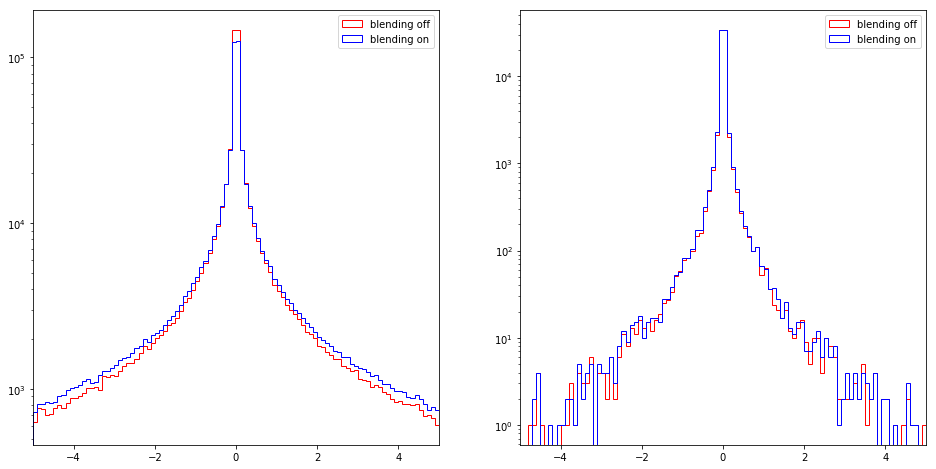

In [164]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(16,8))
ax1,ax2 = axs.flatten()

ax1.hist(cat1['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax1.hist(cat1['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax1.legend()
ax1.set_xlim(-5,5)
ax1.set_yscale("log")

ax2.hist(scat1['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax2.hist(scat1['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax2.legend()
ax2.set_xlim(-5,5)
ax2.set_yscale("log")

## histograms, applied shear 0.02 

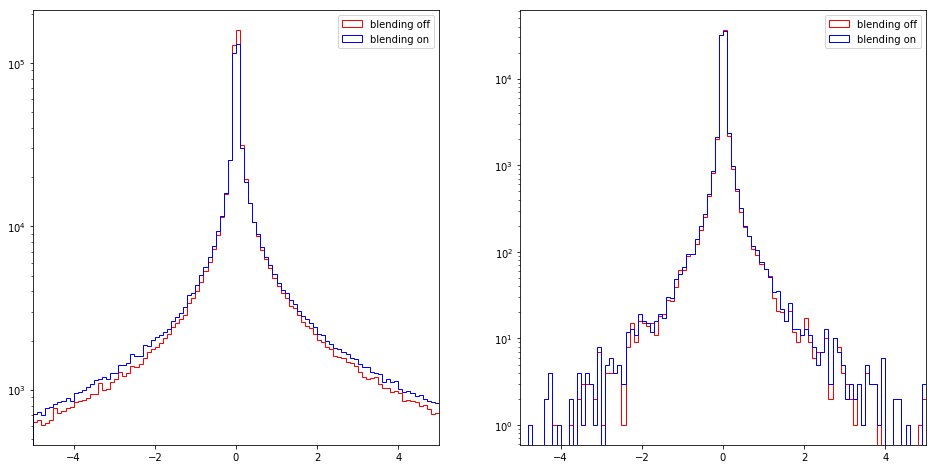

In [165]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(16,8))
ax1,ax2 = axs.flatten()

ax1.hist(cat2['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax1.hist(cat2['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax1.legend()
ax1.set_xlim(-5,5)
ax1.set_yscale("log")

ax2.hist(scat2['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax2.hist(scat2['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax2.legend()
ax2.set_xlim(-5,5)
ax2.set_yscale("log")

## scatter plot

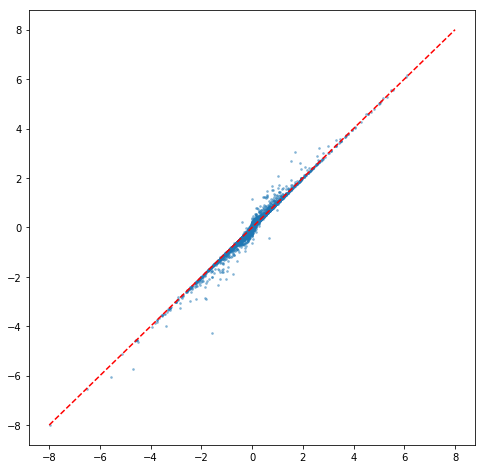

In [163]:
plt.figure(figsize=(8,8))
plt.scatter(scat1['bias_g1'], scat1['bias_g1_grp'], alpha=0.4, s=3)
plt.plot([-8,8],[-8,8],'--',color='r',)

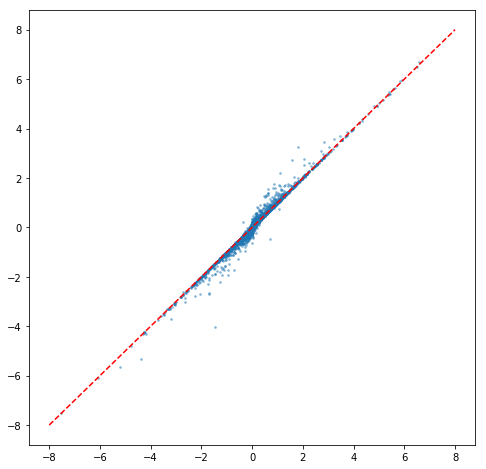

In [164]:
plt.figure(figsize=(8,8))
plt.scatter(scat2['bias_g1'], scat2['bias_g1_grp'], alpha=0.4, s=3)
plt.plot([-8,8],[-8,8],'--',color='r',)

# Medians (low priority)

## boostraps 

In [ ]:
meds1 = weights.boot_fnc(scat1['bias_g1'], np.median, N=1000)
meds2 = weights.boot_fnc(scat2['bias_g1'], np.median, N=1000)

# Clipped Means 

## simple version 

In [29]:
orig_ids = list(scat1['db_id'])
assert orig_ids == list(scat2['db_id']) and len(orig_ids) == len(set(orig_ids)), "something is wrong"

### blending off

In [55]:
def prepare_means_errors(ps, param, scat1, scat2):
    dbt1 = scat1[param]
    dbt2 = scat2[param]

    means1 = [] 
    errors1 = [] 
    means2 = [] 
    errors2 = [] 
    
    for p in tqdm(ps): 
        means1.append(weights.clipped_mean_simple(dbt1, p))
        errors1.append(weights.get_error(dbt1, weights.clipped_mean_fnc(p), N=1000))

        means2.append(weights.clipped_mean_simple(dbt2, p))
        errors2.append(weights.get_error(dbt2, weights.clipped_mean_fnc(p), N=1000))
        
    return means1,errors1,means2,errors2

def plot_simple_clipped_means(ps, means1, errors1, means2, errors2):
    plt.figure(figsize=(10,10))

    for p, mean in zip(ps, means1): 
        if mean > 0:
            red_dot_fill, = plt.plot(p, mean, 'ro', markersize=8)
        else: 
            red_dot_nofill, = plt.plot(p, np.absolute(mean), "o", markerfacecolor='None', color='r', markersize=8)



    for p, mean in zip(ps, means2): 
        if mean > 0:
            blue_dot, = plt.plot(p, mean, 'bo', markersize=8)
        else: 
            plt.plot(p, np.absolute(mean), 'bx', markersize=8)



    red_diamonds, = plt.plot(ps, errors1, 'rd', label= 'error of mean g=0')
    blue_diamonds, = plt.plot(ps, errors2, 'bd', label= 'error of means g=0.02')
    
    if np.any(np.array(means1) > 0): 
        plt.legend([red_dot_fill, red_dot_nofill, blue_dot, red_diamonds, blue_diamonds], 
                   ["Means zero shear positive", "Means zero shear negative", "Means g=0.02, positive", "Error on mean zero shear", "Error on mean g=0.02"], prop={"size":15})
    else: 
         plt.legend([ red_dot_nofill, blue_dot, red_diamonds, blue_diamonds], 
                   ["Means zero shear negative", "Means g=0.02, positive", "Error on mean zero shear", "Error on mean g=0.02"], prop={"size":15})

    plt.xlabel('quantile', size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.yscale('log')

In [ ]:
ps = np.linspace(0, 0.5, 51)

In [8]:
means1, errors1, means2, errors2 = prepare_means_errors(ps, 'bias_g1', scat1, scat2)

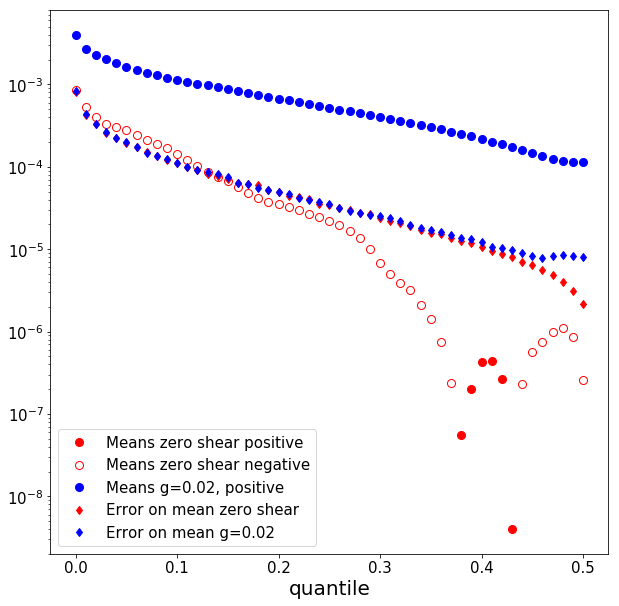

In [26]:
plot_simple_clipped_means(ps, means1, errors1, means2, errors2)

### blending on

In [41]:
ps = np.linspace(0, 0.5, 51)

In [52]:
means1_grp, errors1_grp, means2_grp, errors2_grp = prepare_means_errors(ps, 'bias_g1_grp', scat1, scat2) 

100%|██████████| 51/51 [08:31<00:00,  8.72s/it]


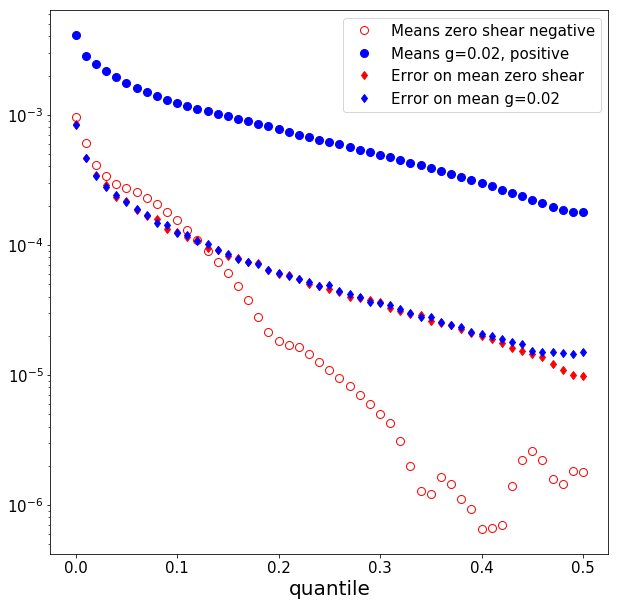

In [56]:
plot_simple_clipped_means(ps, means1_grp, errors1_grp, means2_grp, errors2_grp)

# Weights 

In [ ]:
# before cuts and after cuts. 

In [79]:
def weights_bias_scatter(ax, cat, component, iso_or_grp, xlabel=None, title=None, xlim=(-5,5), size_dots=0.5, alpha=1): 
    orig_ids = list(range(len(cat)))
    ws = weights.get_weights(orig_ids, cat,  component, iso_or_grp, 'component')
    suffix = weights.get_iso_or_grp_suffix(iso_or_grp)

    ax.scatter(cat[f'bias_g{component}{suffix}'], ws, alpha=alpha, s=size_dots, c='b')
    ax.set_title(title, size = 18 )
    ax.set_xlabel(xlabel, size=18)
    ax.set_ylabel('Weights', size=18)
    ax.set_xlim(xlim)

## weights vs bias (blending off/on), g=0

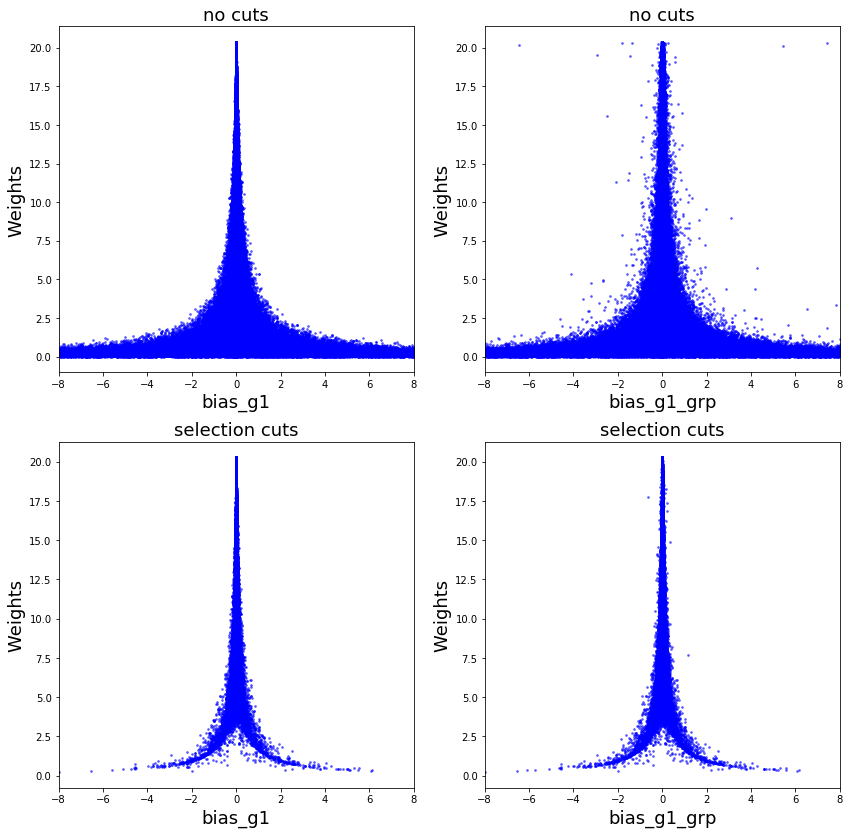

In [80]:
fig, axs = plt.subplots(2,2,figsize=(14,14))
axes = axs.flatten()
weights_bias_scatter(axes[0], cat1, '1', 'iso', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1", title="no cuts")
weights_bias_scatter(axes[1], cat1, '1', 'grp', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1_grp", title="no cuts")
weights_bias_scatter(axes[2], scat1, '1', 'iso', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1", title="selection cuts")
weights_bias_scatter(axes[3], scat1, '1', 'grp', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1_grp", title="selection cuts")

## weights vs bias (blending off/on), g=0.02

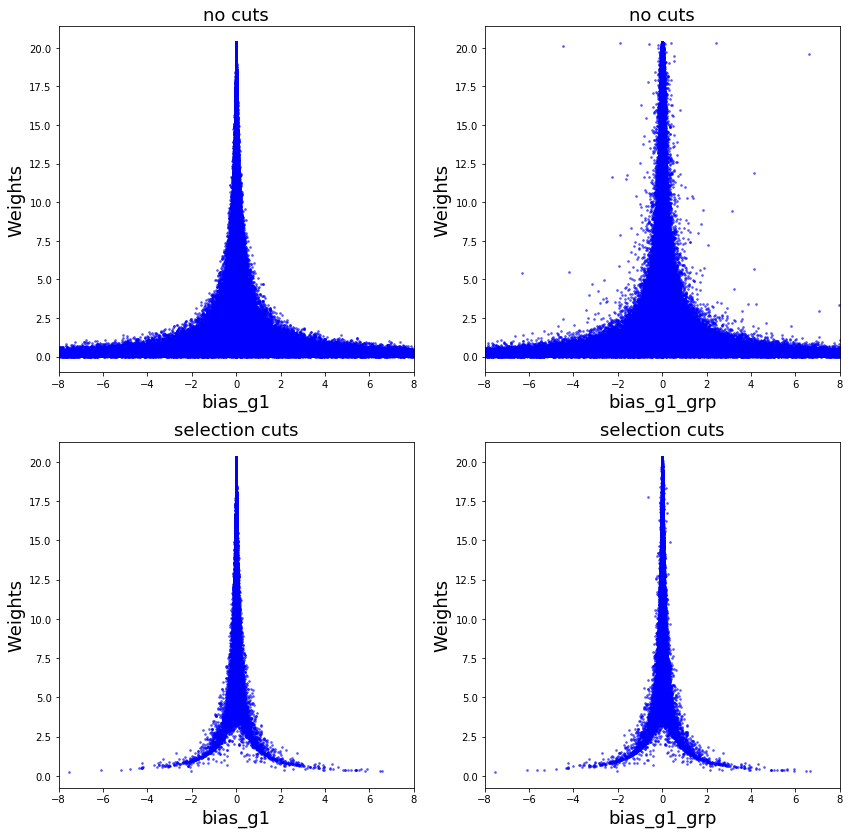

In [81]:
fig, axs = plt.subplots(2,2,figsize=(14,14))
axes = axs.flatten()
weights_bias_scatter(axes[0], cat2, '1', 'iso', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1", title="no cuts")
weights_bias_scatter(axes[1], cat2, '1', 'grp', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1_grp", title="no cuts")
weights_bias_scatter(axes[2], scat2, '1', 'iso', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1", title="selection cuts")
weights_bias_scatter(axes[3], scat2, '1', 'grp', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1_grp", title="selection cuts")

## Weighted means preview 

In [86]:
print(weights.wmean(orig_ids, scat1, '1', 'iso', 'component'))
print(weights.wmean(orig_ids, scat1, '1', 'grp', 'component'))

print(weights.wmean(orig_ids, scat2, '1', 'iso', 'component'))
print(weights.wmean(orig_ids, scat2, '1', 'grp', 'component'))

-0.00021851274
-0.00023184922
0.0010134417
0.0010428239


## Any outliers? 

<font size=3> **Answer:** Not really! Even for blending on! </font>

In [82]:
orig_ids = list(range(len(scat1)))

In [88]:
ws_grp = weights.get_weights(orig_ids, scat1, '1', 'grp', which_shape_noise='component')

In [89]:
scat1[ (ws_grp> 17) & (np.absolute(scat1['bias_g1_grp']) > 0.5 )] #really small outlier, if any. 

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,cond_num,cond_num_grp,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402702075926,402702075926,3,0,1,5943,5962,5480,5498,0.99134684,0.008653155,-609.43994,17.889114,1.0604616,24.39512,0.3437271,124136.45,0.43053705,0.4393904,0.058692172,-0.13002834,0.4970418,0.3729307,-0.57339776,0.7569261,0.9873779,28.925982,28.780598,28.780264,18.337467,16.473484,0.08965597,0.0773172,0.08001852,0.0971504,0.08370333,0.08586127,81719390000.0,22922760000000.0,367.09833,-0.0072794682,0.0014450373,-0.0031939438,-7.2728994e-07,3.4236656e-08,-57455.14,-0.5843535,-0.6237857,0.20380905,0.2292494,-0.061635386,134,False


## weight vs condition number

In [12]:
cond_num = np.log10(scat1['cond_num'])

Text(0, 0.5, 'cond_num')

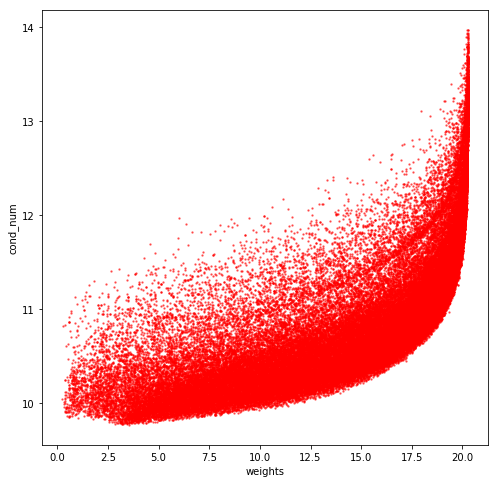

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(weights.get_weights(scat1, '1', 'iso'), cond_num, s=2, alpha=0.5, color='r')
plt.xlabel("weights")
plt.ylabel("cond_num")

## weighted means and bootstraps 

In [91]:
#as a function of shear and their errors, bootstraps. 
orig_ids = list(range(len(scat1)))

### Blending off 

In [105]:
wmean1 = weights.wmean(orig_ids, scat1, '1', 'iso', 'component') #component by default 
wmean2 = weights.wmean(orig_ids, scat2, '1', 'iso', 'component') #component by default 

In [100]:
#boostraps: 
results = weights.boots_fnc(orig_ids, [scat1,scat2] , weights.wmean, N=1000, args=['1', 'iso', 'component'])

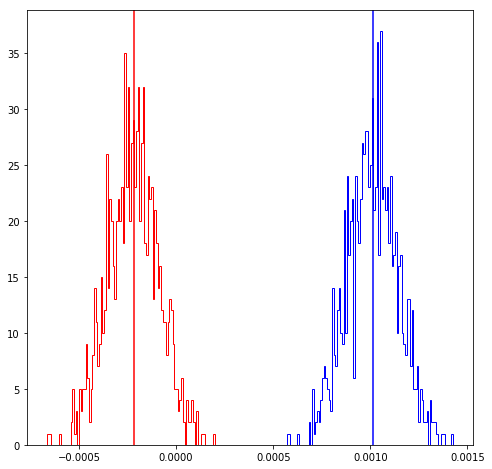

In [106]:
plt.figure(figsize=(8,8))
plt.hist(results[0], bins=100, color='r', histtype='step');
plt.hist(results[1], bins=100, color='b', histtype='step');
plt.axvline(wmean1, c='r')
plt.axvline(wmean2, c='b')



In [119]:
#calculate their errors 
errs_iso = weights.get_errors(orig_ids, [scat1, scat2], weights.wmean, N=1000, args=['1', 'iso', 'component'])

In [120]:
errs_iso

[0.00013857713, 0.0001386957]

### blending on

In [108]:
wmean1 = weights.wmean(orig_ids, scat1, '1', 'grp', 'component') #component by default 
wmean2 = weights.wmean(orig_ids, scat2, '1', 'grp', 'component') #component by default 

In [107]:
results_grp = weights.boots_fnc(orig_ids, [scat1,scat2] , weights.wmean, N=1000, args=['1', 'grp', 'component'])

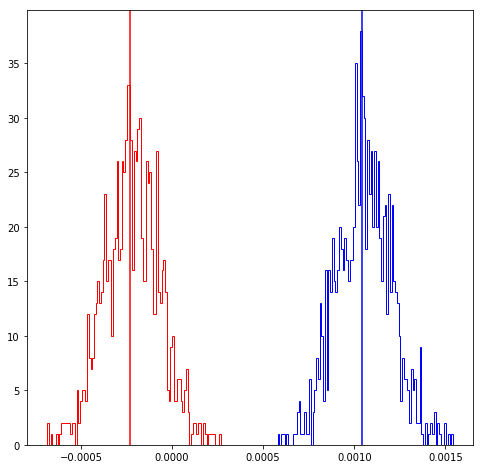

In [110]:
plt.figure(figsize=(8,8))
plt.hist(results_grp[0], bins=100, color='r', histtype='step');
plt.hist(results_grp[1], bins=100, color='b', histtype='step');
plt.axvline(wmean1, c='r')
plt.axvline(wmean2, c='b')




In [118]:
errs_grp = weights.get_errors(orig_ids, [scat1, scat2], weights.wmean, N=1000, args=['1', 'grp', 'component'])

In [121]:
errs_grp

[0.00014415626, 0.00014399478]

## Plot them along w/ clipped means 

In [114]:
orig_ids = list(range(len(scat1)))
ps = np.linspace(0, 0.5, 51)




In [124]:
def prepare_means(orig_ids,ps, scat1, scat2, param, iso_or_grp ):
    means1 = [] 
    errors1 = [] 
    means2 = [] 
    errors2 = [] 
    for p in tqdm(ps): 
        means1.append(weights.clipped_mean(orig_ids, scat1, param, p))
        means2.append(weights.clipped_mean(orig_ids, scat2, param, p))
        errors_p = weights.get_errors(orig_ids, [scat1,scat2], clipped_mean, N=1000, args=[param,p])
        errors1_iso.append(errors_p[0])
        errors2_iso.append(errors_p[1])
        

    wmean1 = weights.wmean(orig_ids, scat1, '1', iso_or_grp, 'component')
    wmean2 =  weights.wmean(orig_ids, scat2, '1', iso_or_grp, 'component')

    wmean1_error_iso,wmean2_error_iso = get_errors(orig_ids, [scat1,scat2], wmean, N=1000, args=['1',iso_or_grp,'component'])
    #print results. 
    print()
    print(wmean1_iso, wmean1_mag_iso, wmean2_iso, wmean2_mag_iso)
    print(wmean1_error, wmean1_mag_error, wmean2_error,  wmean2_mag_error)

In [125]:
def quantile_summary(ps, means1, means2, errors1, errors2, wmean1, wmean2, wmean1_error, wmean2_error, legend_size=10,labels_wmean=['']*4): 
    plt.figure(figsize=(12,12))
    

    for p, mean in zip(ps, means1): 
        if mean > 0:
            plt.plot(p, mean, 'ro', markersize=8)
        else: 
            plt.plot(p, np.absolute(mean), "o", markerfacecolor='None', color='r', markersize=8)



    for p, mean in zip(ps, means2): 
        if mean > 0:
            plt.plot(p, mean, 'bo', markersize=8)
        else: 
            plt.plot(p, np.absolute(mean), "o", markerfacecolor='None', color='b', markersize=8)
            
    
    red_dot_fill, = plt.plot([], [], 'ro')
    red_dot_nofill, = plt.plot([], [], "o", markerfacecolor='None', color='r')
    blue_dot, = plt.plot([],[], 'bo')
    blue_dot_nofill,  = plt.plot([],[], "o", markerfacecolor='None', color='b', markersize=8)
    red_diamonds, = plt.plot(ps, errors1, 'r+', label= 'error of mean g=0')
    blue_diamonds, = plt.plot(ps, errors2, 'bx', label= 'error of means g=0.02')
    

    red_line = plt.axhline(np.absolute(wmean1), c='r')
    red_line_dashed = plt.axhline(wmean1_error, c='r', linestyle='--')

    red_dashdot = plt.axhline(np.absolute(wmean1_mag), c='r', linestyle='dashdot')
    red_line_dotted = plt.axhline(wmean1_mag_error, c='r', linestyle='dotted')


    blue_line = plt.axhline(np.absolute(wmean2), c='b')
    blue_line_dashed = plt.axhline(wmean2_error, c='b', linestyle='--')

    blue_line_dashdot = plt.axhline(np.absolute(wmean2_mag), c='b', linestyle='dashdot')
    blue_line_dotted = plt.axhline(wmean2_mag_error, c='b', linestyle='dotted')

    plt.legend([red_dot_fill, red_dot_nofill, red_diamonds, 
                red_line, red_line_dashed, red_dashdot, red_line_dotted, 
                blue_dot, blue_dot_nofill, blue_diamonds, 
                blue_line, blue_line_dashed], 
               ["Means zero shear (positive)", "Means zero shear (negative)", "corresponding error", 
                f"Weighted mean zero shear ({labels_wmean[0]})", "corresponding error", 
                f"Weighted mean,g=0, sn magnitude ({labels_wmean[1]})", "corresponding error",
                "Means g=0.02 (positive)",  "Means g=0.02 (negative)",  "Errors on mean g=0.02", 
                f"weighted mean g=0.02 ({labels_wmean[2]})", "corresponding error", 
                f"weighted mean,g=0.02, sn magnitude ({labels_wmean[3]})", "corresponding error"
               ], loc='best', prop={"size":legend_size}, bbox_to_anchor=(1,1))
    
    plt.xlabel('quantile', size=22)
    plt.xticks(size=18)
    plt.yticks(size=18)
    plt.yscale('log')
    

# Triangle plots 

## blending off 

In [128]:
import corner 
reload(corner)

<module 'corner' from '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/miniconda3/envs/igalsim/lib/python3.7/site-packages/corner/__init__.py'>

In [129]:
params = ['bias_f', 'bias_s', 'bias_x', 'bias_y', 'bias_g1', 'bias_g2']

biases = np.array([list(scat1[param]) for param in params]).T

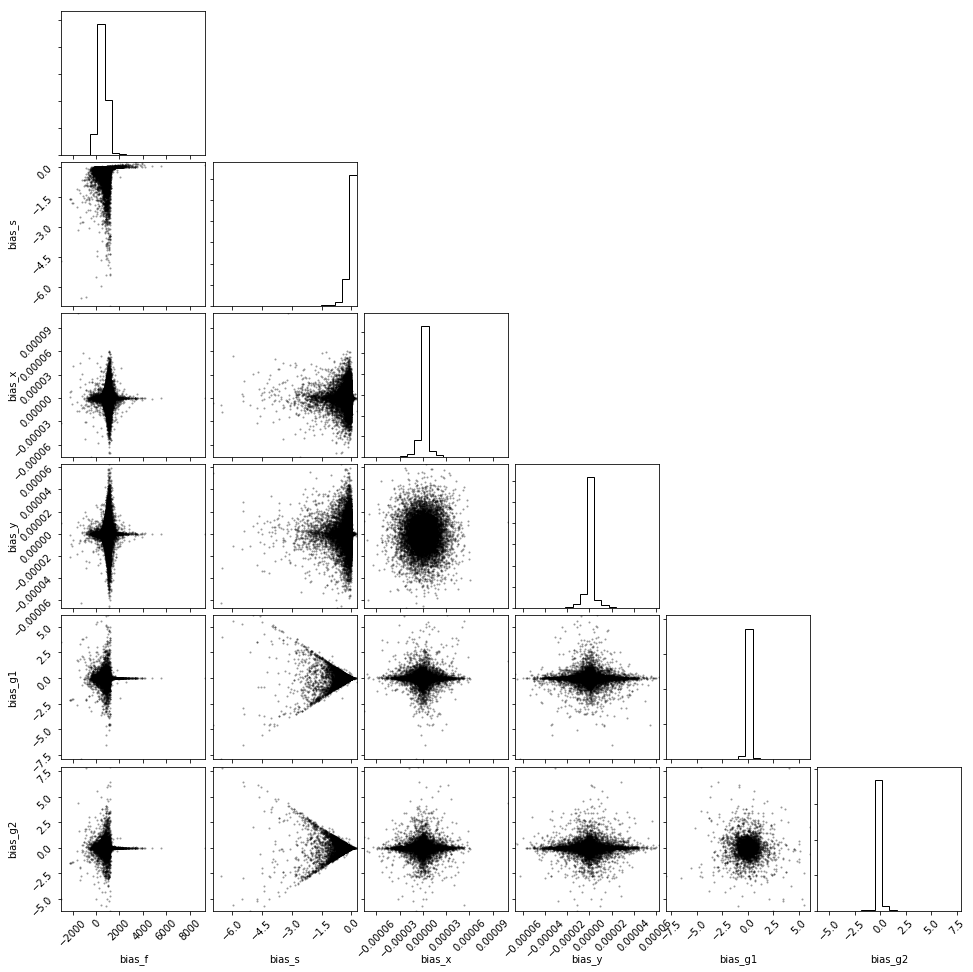

In [131]:
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quiet':True, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.4, #'markevery':4
                                                                                    }}
figure = corner.corner(biases, labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
# figure.savefig(os.path.join("data", 'ntriangle1.pdf'))



## blending on 

In [132]:
params_grp = [param+'_grp' for param in params]
biases_grp = np.array([list(scat1[param]) for param in params]).T

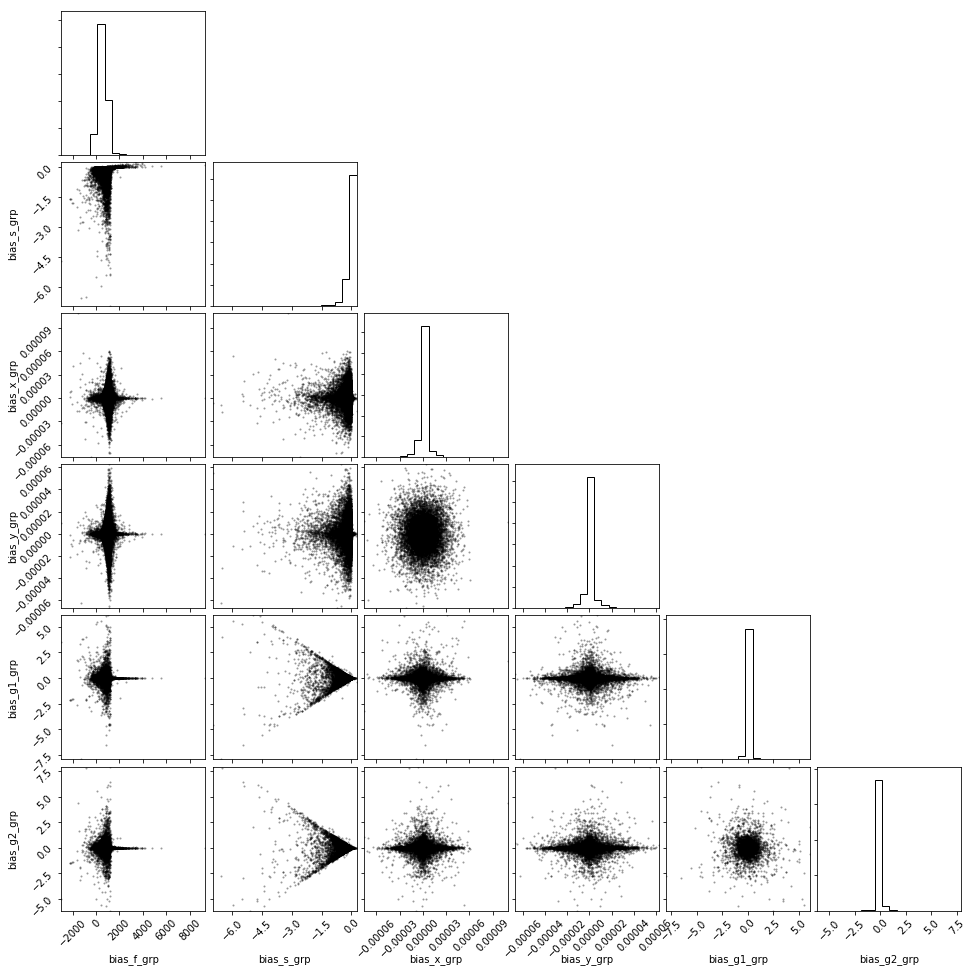

In [133]:
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quiet':True, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.4, #'markevery':4
                                                                                    }}
figure = corner.corner(biases_grp, labels=params_grp, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
# figure.savefig(os.path.join("data", 'ntriangle1.pdf'))




## bulge, and bulge+disk separately

In [140]:
params = ['bias_f', 'bias_s', 'bias_x', 'bias_y', 'bias_g1', 'bias_g2']
params_grp = [param+'_grp' for param in params]
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quiet':True, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.4, #'markevery':4
                                                                                    }

In [ ]:

biases = np.array([list(scat1[scat1['f_disk']==1][param]) for param in params]).T
biases_grp = np.array([list(scat1[scat1['f_disk']==1][param]) for param in params_grp]).T

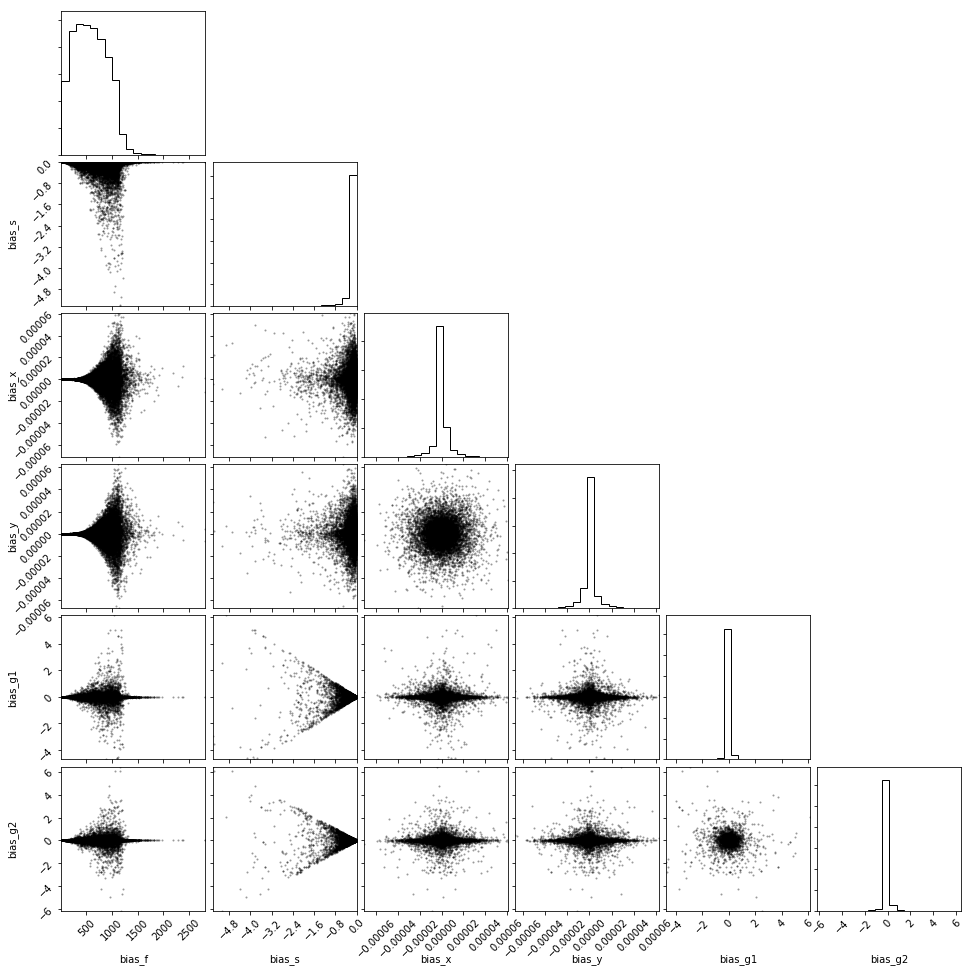

<Figure size 432x288 with 0 Axes>

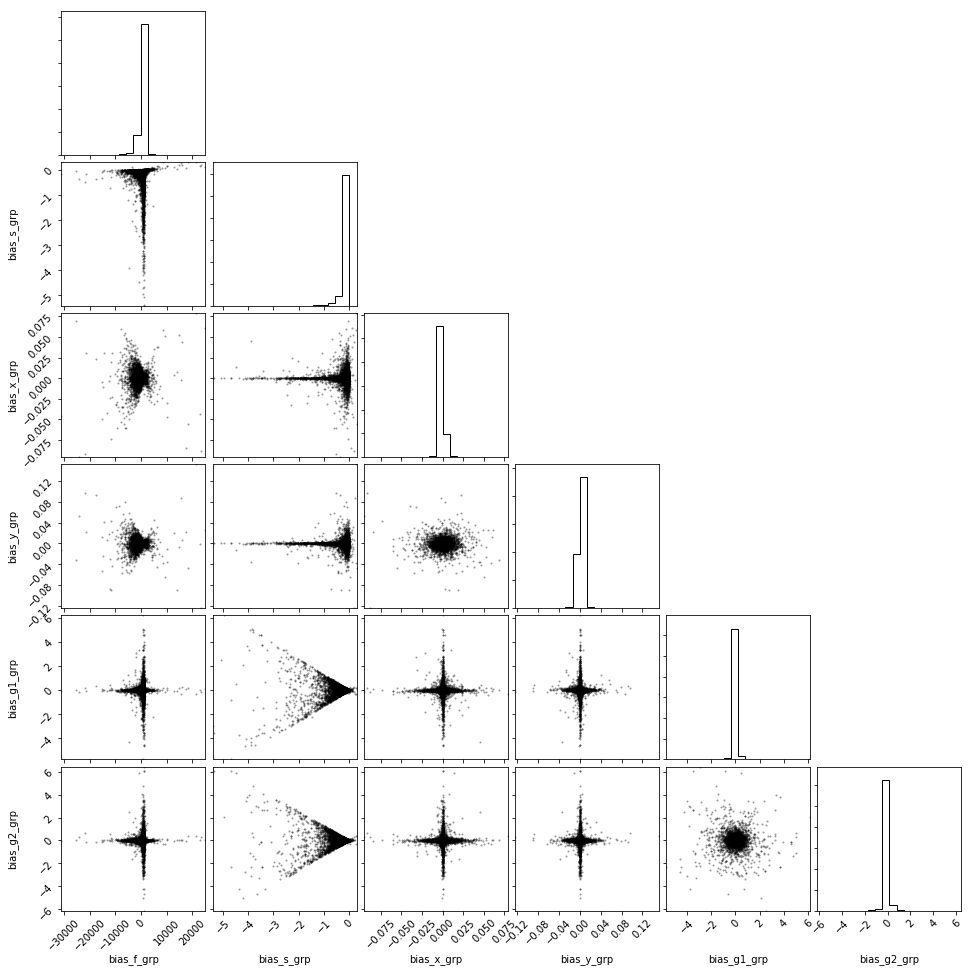

In [141]:
#all disk. 

#blending off, then on. 
figure = corner.corner(biases, labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
plt.figure()
figure = corner.corner(biases_grp, labels=params_grp, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);



In [142]:
#mixed

biases = np.array([list(scat1[scat1['f_disk']<1][param]) for param in params]).T
biases_grp = np.array([list(scat1[scat1['f_disk']<1][param]) for param in params_grp]).T

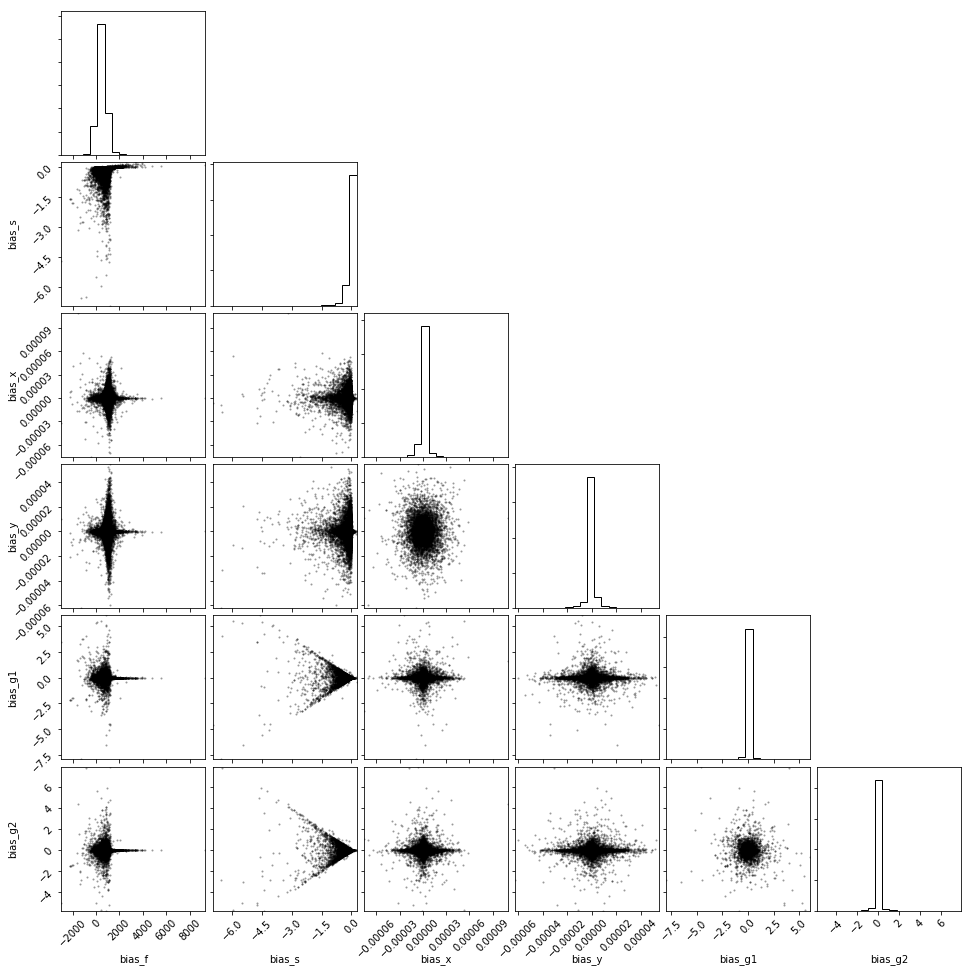

<Figure size 432x288 with 0 Axes>

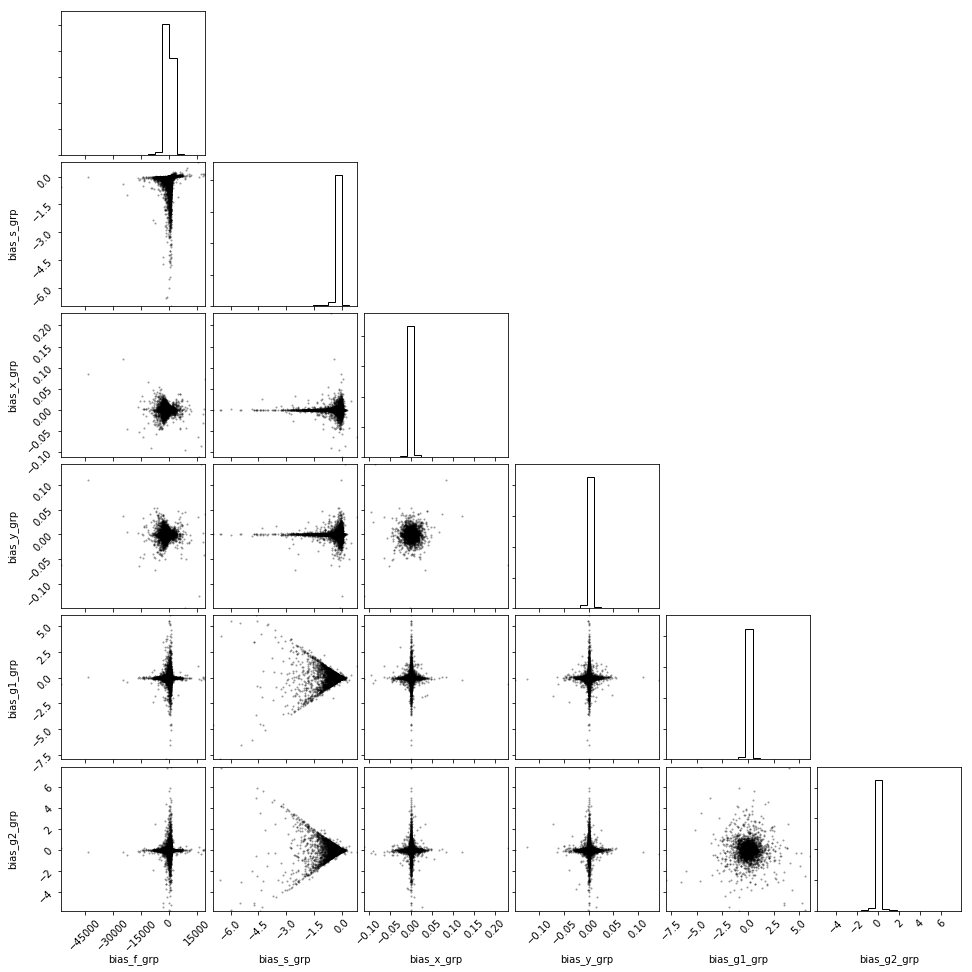

In [143]:
#blending off, then on. 
figure = corner.corner(biases, labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
plt.figure()
figure = corner.corner(biases_grp, labels=params_grp, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);




# Money Plot 


In [146]:
len(scat1)

77657

In [148]:
len(maps.good(maps.best(cat1)))

113062

# Errors on parameters 

In [27]:
cat1

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,cond_num,cond_num_grp,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402713998325,402713998325,1,0,1,1485,1494,1101,1109,1.0,0.0,-1501.99,-1578.9215,1.4931169,27.32716,0.027090073,8338.418,0.17037426,0.17058848,0.034545686,0.007946532,0.17652461,0.1644382,0.113048285,0.64148796,1.0,2.595915,2.5943427,2.5943427,1.7340847,1.7340847,2.4531348,2.3599927,2.3556159,2.4531348,2.3599927,2.3556159,511302370.0,511302370.0,4963.3027,-9.573509,1.2778087,0.3118186,-0.00023861162,0.0013744844,4963.3027,-9.573509,1.2778087,0.3118186,-0.00023861162,0.0013744844,-1,False
402707721988,402707721988,1,0,1,1487,1499,1114,1124,1.0,0.0,-1501.2764,-1576.0681,1.5247434,26.49101,0.1576786,18011.229,0.22732957,0.29519588,0.5003131,0.07169516,0.39661473,0.13029958,0.07116579,0.68138134,1.0,5.219607,5.2137275,5.2137275,3.4891286,3.4891286,1.6792207,1.6257305,0.6823848,1.6792207,1.6257305,0.6823848,2622856200.0,2622856200.0,2210.5095,-4.027542,4.968526,0.71164083,0.0002924066,-0.000333437,2210.5095,-4.027542,4.968526,0.71164083,0.0002924066,-0.000333437,-1,False
402711568059,402711568059,2,0,1,1572,1583,1178,1189,1.0,0.0,-1484.4395,-1563.241,1.3594306,26.909607,0.15937233,12249.118,0.4083638,0.41930902,0.033213258,0.1591868,0.48117438,0.3465708,0.6825519,0.74528176,0.9980063,2.9101856,2.9086542,2.9086537,1.712295,1.7097402,1.0186594,0.83280504,0.89374804,1.0198406,0.8338004,0.8943873,965269060.0,968920770.0,5858.2583,-0.6535859,0.095544726,0.45679542,-0.0018338466,-0.0005370976,5616.922,-0.68688405,0.063183576,0.4392393,0.003902756,0.0013156871,-1,False
402715332898,402711568059,2,1,1,1564,1572,1176,1183,1.0,0.0,-1486.2251,-1563.931,1.1837199,27.665714,0.31339455,6104.6655,0.13685672,0.16091256,0.3478819,-0.19875641,0.20921569,0.0895237,-0.25953704,0.63868046,0.9955437,1.9441333,1.9432199,1.9432191,1.2848414,1.2830278,7.740673,6.9040146,5.037416,7.7452555,6.904483,5.0421047,320587420.0,968920770.0,7790.848,-96.77082,95.326645,-54.31325,-0.0045463275,0.010874793,7761.365,-96.91407,95.33275,-54.463554,-0.0061707837,0.0105987415,-1,False
402709443937,402709443937,2,0,1,1527,1536,1175,1185,1.0,0.0,-1493.5836,-1563.9469,1.8123116,26.506392,0.0082530975,17757.875,0.0921419,0.093199134,0.078341,0.07260089,0.10257024,0.0827738,0.37369397,0.6253745,0.9957436,5.9279714,5.919206,5.9192004,4.2533655,4.187064,2.7125394,2.686095,2.673198,2.744177,2.7223003,2.6793787,2355132700.0,35380724000.0,1747.0532,-16.173626,4.702052,4.3614597,0.00012900875,8.307483e-05,1678.678,-16.507904,4.2912755,4.3706045,-0.0015991725,0.0007905548,-1,False
402714392263,402709443937,2,1,1,1535,1543,1177,1186,0.2859962,0.7140038,-1492.134,-1563.5671,2.7209578,27.43301,-0.059402466,7563.8613,0.47873586,0.48170272,0.003847709,0.07850621,0.5179672,0.44247594,0.760912,0.78318495,0.9460241,1.6225832,1.6220304,1.6220189,0.47335115,0.46757066,5.9407434,2.6507583,3.814247,5.985962,2.689497,3.8209755,1846465400.0,35380724000.0,21323.254,-2.3554688,0.22648379,7.619581,-0.008547186,-0.00634518,20739.346,-2.7569191,-0.1714846,7.6273484,-0.00092189526,-0.005433006,-1,False
402701771027,402701771027,1,0,1,1528,1546,1136,1153,0.98696816,0.01303185,-1492.4906,-1570.9366,0.9377821,24.244675,0.5533581,142586.27,0.30176535,0.305207,0.020416385,0.10451396,0.33580965,0.27117246,0.68893987,0.6893171,1.0,38.46108,38.16828